The goal of this project is to inspect prices for "select" food items over in Canada over the past 5 years. By the end of this project, we'll achieve the following:
- Obtain data from the internet and prepare it for analysis
- Analyze the data using Python

Specifically we'll answer the following questions:
1. What is the most expensive grocery item in Canada?
2. What state has the lowest standard of living?
3. What grocery item's price is expected to increase within the next few years?
4. Are the prices expected to continue increasing?
5. What food item's price has increased the slowest?

First, we'll import the some helper functions and then import the sample data into python. Let's start by converting the data into a list of lists such that we can easily work with it.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
food_df = pd.read_csv('data.csv', header = None, nrows = 26000)
data = food_df.values.tolist()
print(len(data)) 

26000


Now to answer the first question, we will find the average price for each food item across all the provinces in a 3 year period(2018,2020, 2022) 

In [2]:
print(data[0:4])

[['Date', 'Province', 'Food_Item', 'price'], ['2018-02-01', 'Alberta', 'Almonds, 200 grams', '4.44'], ['2018-02-01', 'Alberta', 'Apple juice, 2 litres', '2.72'], ['2018-02-01', 'Alberta', 'Apples, per kilogram', '3.87']]


In [3]:
#First we will split the item and the measurement into separate columns
#items = []
for row in data[1:]:
    item = row[2].split(', ')
    row[2] = item[0]
    row.append(item[-1])

data[0].append('Size')
print(data[0:6])
    

[['Date', 'Province', 'Food_Item', 'price', 'Size'], ['2018-02-01', 'Alberta', 'Almonds', '4.44', '200 grams'], ['2018-02-01', 'Alberta', 'Apple juice', '2.72', '2 litres'], ['2018-02-01', 'Alberta', 'Apples', '3.87', 'per kilogram'], ['2018-02-01', 'Alberta', 'Avocado', '1.53', 'unit'], ['2018-02-01', 'Alberta', 'Baby food', '1.27', '128 millilitres']]


Next, we'll find the average prices of all the items based on the size purchased. Let's first find the total price per product and then compute the average.

In [4]:
total_price = {}
number_of_months = {}
item_avg_price = {}
for row in data[1:]:
    price = float(row[3])
    item = row[2]
    size = row[4]
    if item in total_price and 'kilogram' in size:
        total_price[item] += price
        number_of_months[item] += 1
    elif item not in total_price and 'kilogram' in size:
        total_price[item] = price
        number_of_months[item] = 1
for item in total_price:
    price_avg = total_price[item]/number_of_months[item]
    item_avg_price[item] = price_avg
#print(total_price) - to print the total price
#print(number_of_months) - to print the length of time 
#for which the price is calculated
print(item_avg_price)

{'Apples': 4.705358649789028, 'Bananas': 1.748016877637131, 'Beef rib cuts': 22.852911392405076, 'Beef stewing cuts': 14.583628691983119, 'Beef striploin cuts': 22.650886075949373, 'Beef top sirloin cuts': 16.45628691983122, 'Cabbage': 2.2924894514767957, 'Carrots': 3.3544725738396615, 'Chicken breasts': 12.31987341772152, 'Chicken drumsticks': 6.0133755274261596, 'Chicken thigh': 8.967805907172991, 'Grapes': 6.364491525423735, 'Ground beef': 9.449915254237286, 'Onions': 3.8924152542372896, 'Oranges': 4.4959745762711885, 'Peanut butter': 4.740550847457628, 'Pears': 4.672372881355929, 'Peppers': 7.535550847457624, 'Pork loin cuts': 8.336440677966104, 'Pork rib cuts': 8.924533898305087, 'Pork shoulder cuts': 6.057838983050849, 'Potatoes': 4.509766949152538, 'Salmon': 22.514830508474567, 'Squash': 4.021906779661015, 'Sweet potatoes': 3.811271186440679, 'Tomatoes': 5.0764406779661, 'Wheat flour': 4.835508474576271, 'White rice': 8.384915254237278, 'White sugar': 2.470169491525423, 'Whole c

In [5]:
#Let's sort the variables
sorted_avg_food_prices = sorted(item_avg_price.items(), key=lambda x:x[1])
sorted_dict = dict(sorted_avg_food_prices)
print('Food_Item Average_Price')
for item, price in sorted_dict.items():
    print(f'{item} {price}')

Food_Item Average_Price
Bananas 1.748016877637131
Cabbage 2.2924894514767957
White sugar 2.470169491525423
Carrots 3.3544725738396615
Sweet potatoes 3.811271186440679
Onions 3.8924152542372896
Squash 4.021906779661015
Oranges 4.4959745762711885
Potatoes 4.509766949152538
Pears 4.672372881355929
Apples 4.705358649789028
Peanut butter 4.740550847457628
Wheat flour 4.835508474576271
Tomatoes 5.0764406779661
Whole chicken 5.77779661016949
Chicken drumsticks 6.0133755274261596
Pork shoulder cuts 6.057838983050849
Grapes 6.364491525423735
Peppers 7.535550847457624
Pork loin cuts 8.336440677966104
White rice 8.384915254237278
Pork rib cuts 8.924533898305087
Chicken thigh 8.967805907172991
Ground beef 9.449915254237286
Chicken breasts 12.31987341772152
Beef stewing cuts 14.583628691983119
Beef top sirloin cuts 16.45628691983122
Salmon 22.514830508474567
Beef striploin cuts 22.650886075949373
Beef rib cuts 22.852911392405076


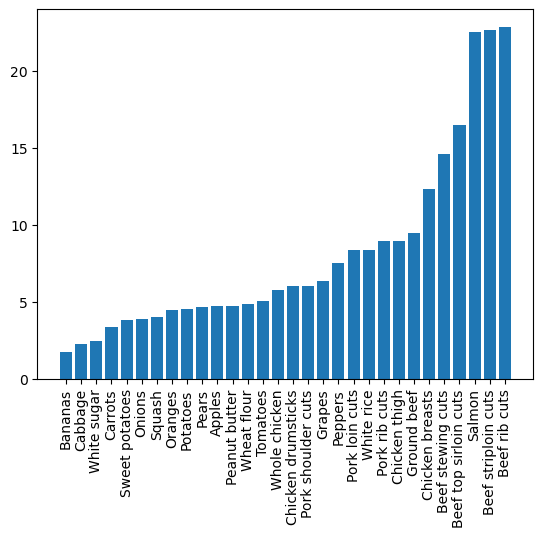

In [6]:
names = list(sorted_dict.keys())
values = list(sorted_dict.values())

plt.bar(range(len(sorted_dict)), values, tick_label = names)
plt.xticks(rotation=90)
plt.show()

Now, we can make our conclusion and are certain that beef is one of the most expensive items in canada. This is true because beef appears quite a bit in the top 5 most expensive items in the country based on the average prices computed over a 5 year period across most of the provinces.

The next question we would like to answer is what state has the lowest standard of living. To do this, we can compare the find the average prices of the food items over a 5 year period and compare them across the different states. Let's import the dataset again with its header values and separate the datasets for different provinces into different dfs.

In [7]:
food_dataset = pd.read_csv('data.csv', nrows = 26000)
food_dataset.head()

,Date,Province,Food_Item,price
0,2018-02-01,Alberta,"Almonds, 200 grams",4.44
1,2018-02-01,Alberta,"Apple juice, 2 litres",2.72
2,2018-02-01,Alberta,"Apples, per kilogram",3.87
3,2018-02-01,Alberta,"Avocado, unit",1.53
4,2018-02-01,Alberta,"Baby food, 128 millilitres",1.27


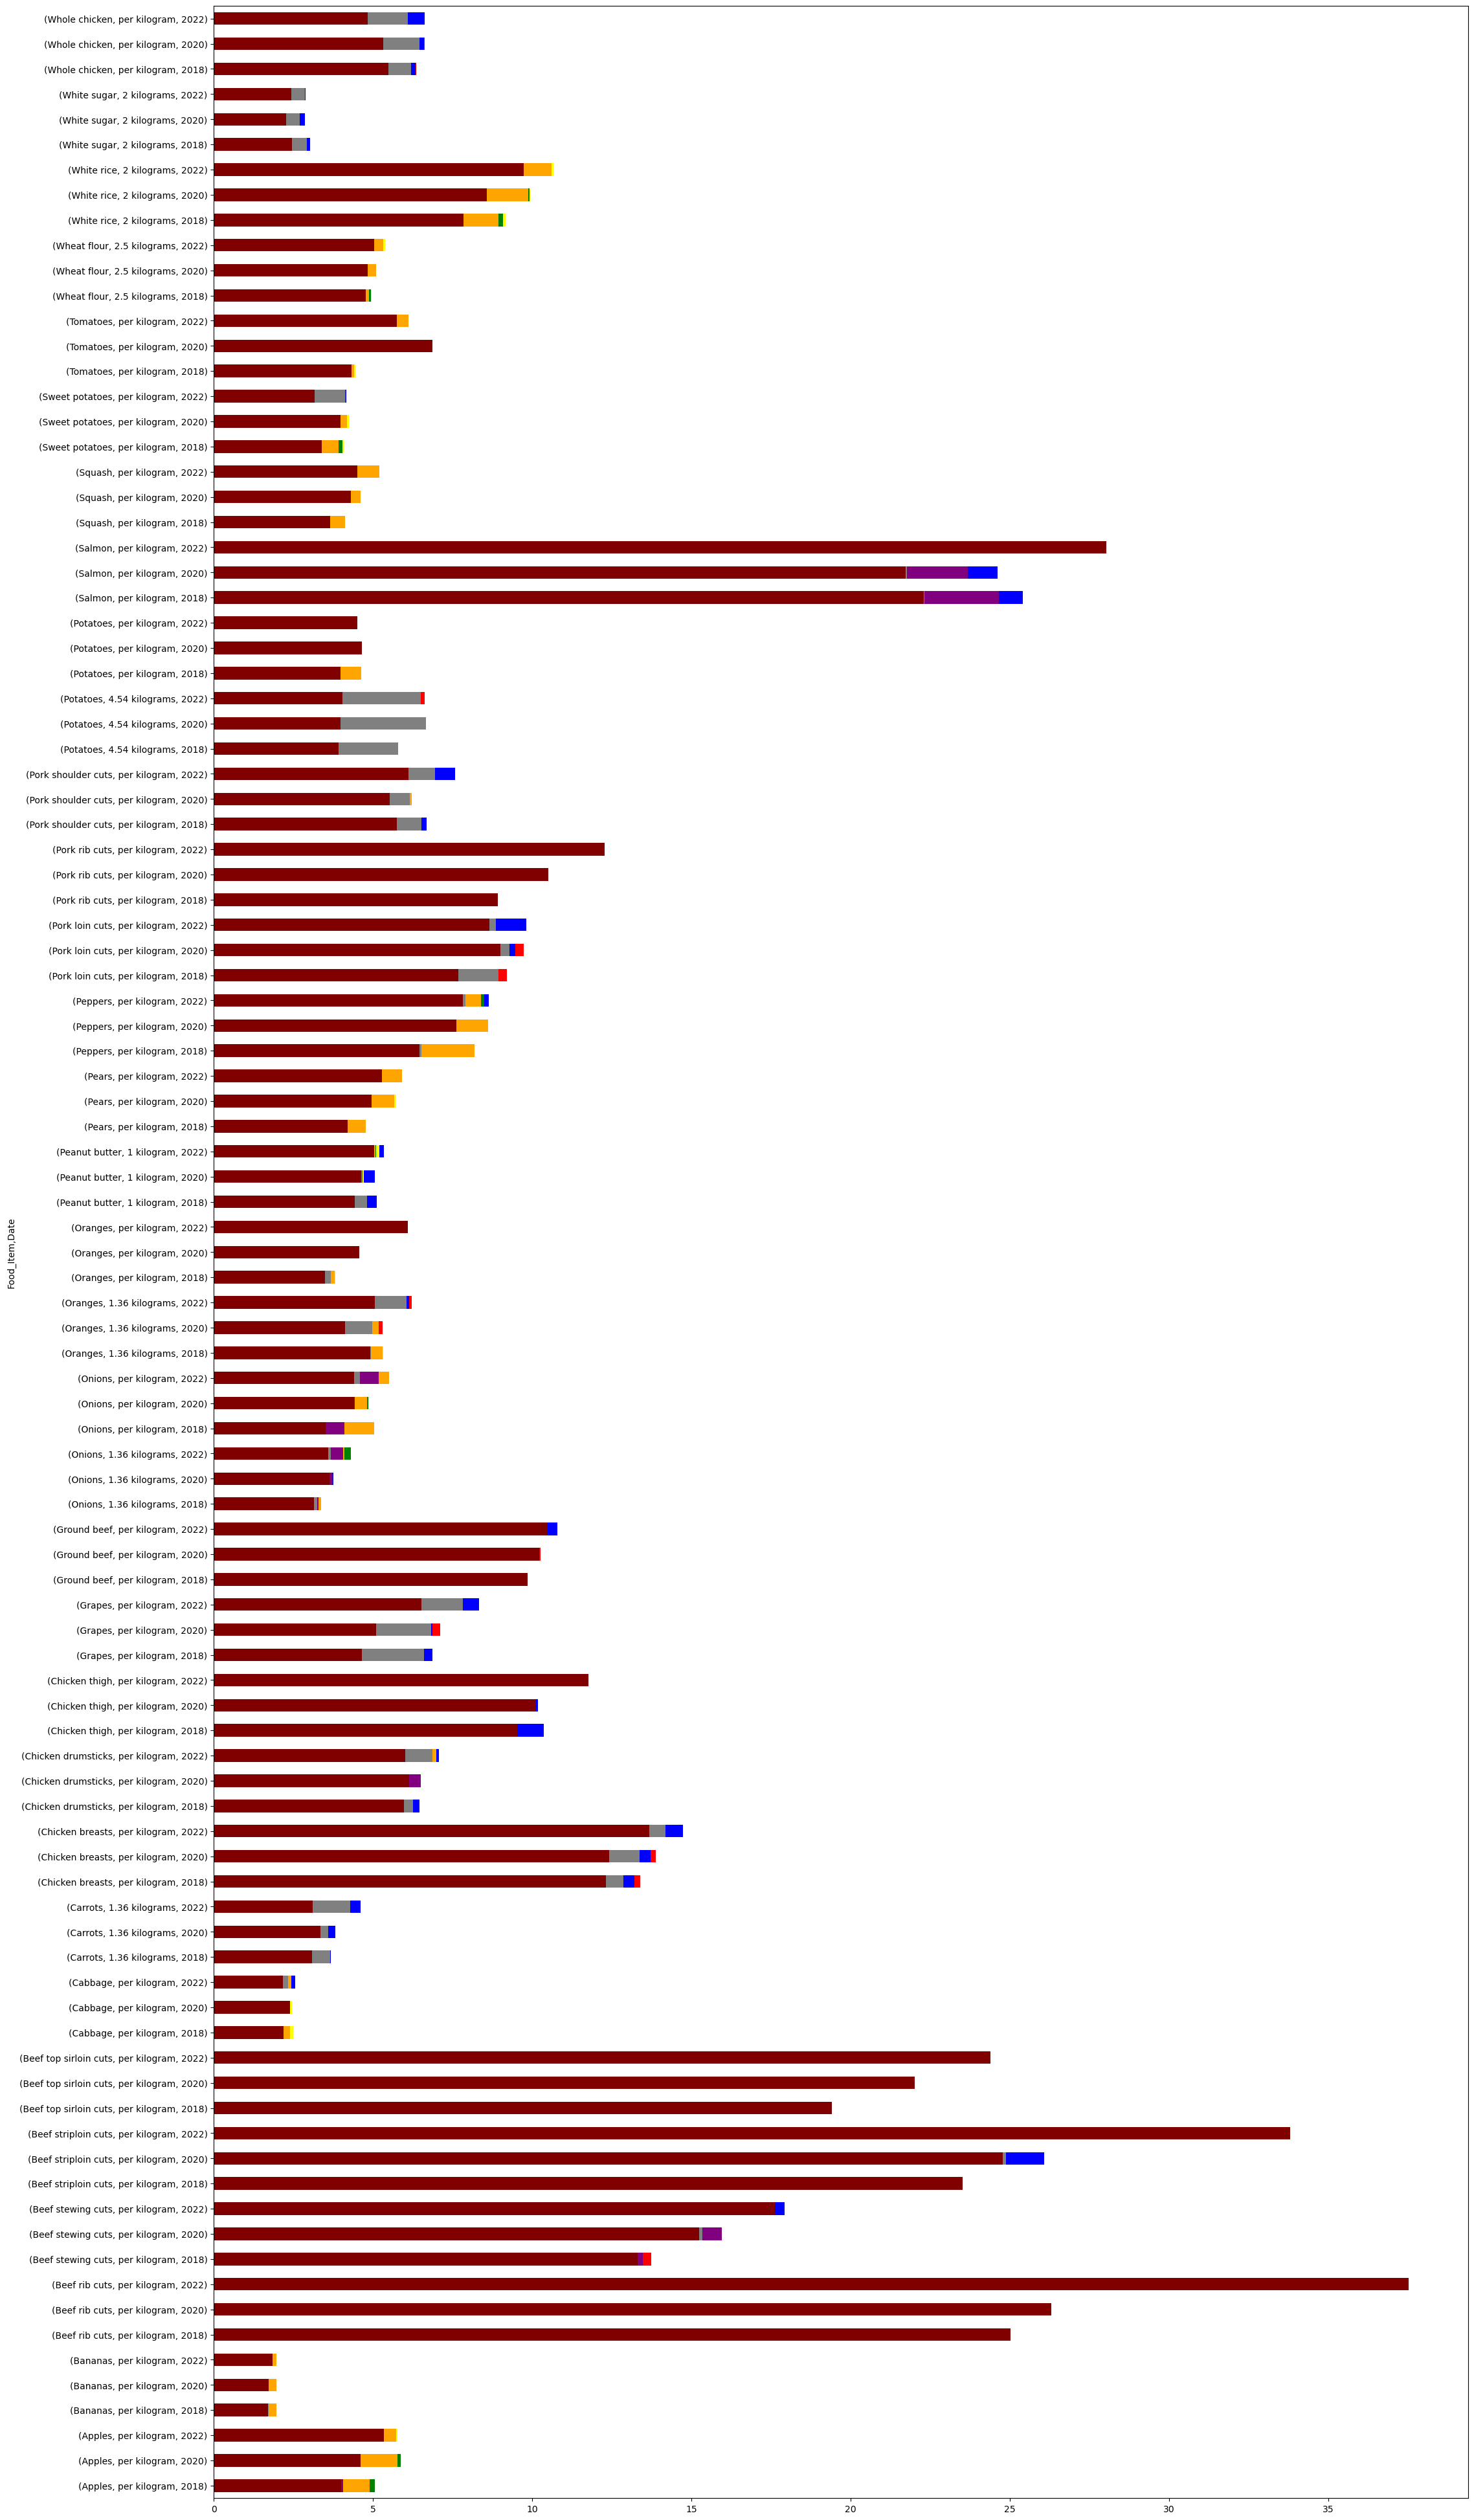

In [24]:
food_dataset.set_index("Food_Item")
food_dataset['Date'] = pd.to_datetime(food_dataset['Date'])

#AB - isolate the Alberta values and the food items based on the quantity purchased - kg
AB_dataset = food_dataset[(food_dataset['Province'] == 'Alberta')
                          & (food_dataset['Food_Item'].str.contains('kilogram'))]
#set index for the dataframe
AB_dataset.set_index("Food_Item")
#Next, we want to group the AB dataset by year and find the average price for each year, then plot the data
AB_dataset_aggreg = AB_dataset.groupby(['Food_Item', AB_dataset.Date.dt.year])[ 'price'].mean()

#BC
BC_dataset = food_dataset[(food_dataset['Province'] == 'British Columbia')
                          & (food_dataset['Food_Item'].str.contains('kilogram'))]
BC_dataset.set_index("Food_Item")
BC_dataset_aggreg = BC_dataset.groupby(['Food_Item', BC_dataset.Date.dt.year])[ 'price'].mean()

#MB
MB_dataset = food_dataset[(food_dataset['Province'] == 'Manitoba')
                          & (food_dataset['Food_Item'].str.contains('kilogram'))]
MB_dataset.set_index("Food_Item")
MB_dataset_aggreg = MB_dataset.groupby(['Food_Item', MB_dataset.Date.dt.year])[ 'price'].mean()

#NB
NB_dataset = food_dataset[(food_dataset['Province'] == 'New Brunswick')
                          & (food_dataset['Food_Item'].str.contains('kilogram'))]
NB_dataset.set_index("Food_Item")
NB_dataset_aggreg = NB_dataset.groupby(['Food_Item', NB_dataset.Date.dt.year])[ 'price'].mean()

#NS
NS_dataset = food_dataset[(food_dataset['Province'] == 'Nova Scotia')
                          & (food_dataset['Food_Item'].str.contains('kilogram'))]
NS_dataset.set_index("Food_Item")
NS_dataset_aggreg = NS_dataset.groupby(['Food_Item', NS_dataset.Date.dt.year])[ 'price'].mean()

#PEI
PEI_dataset = food_dataset[(food_dataset['Province'] == 'Prince Edward Island')
                          & (food_dataset['Food_Item'].str.contains('kilogram'))]
PEI_dataset.set_index("Food_Item")
PEI_dataset_aggreg = PEI_dataset.groupby(['Food_Item', PEI_dataset.Date.dt.year])[ 'price'].mean()

#ON
ON_dataset = food_dataset[(food_dataset['Province'] == 'Ontario')
                          & (food_dataset['Food_Item'].str.contains('kilogram'))]
ON_dataset.set_index("Food_Item")
ON_dataset_aggreg = ON_dataset.groupby(['Food_Item', ON_dataset.Date.dt.year])[ 'price'].mean()

#QB
QB_dataset = food_dataset[(food_dataset['Province'] == 'Quebec')
                          & (food_dataset['Food_Item'].str.contains('kilogram'))]
QB_dataset.set_index("Food_Item")
QB_dataset_aggreg = QB_dataset.groupby(['Food_Item', QB_dataset.Date.dt.year])[ 'price'].mean()


#SK
SK_dataset = food_dataset[(food_dataset['Province'] == 'Saskatchewan')
                          & (food_dataset['Food_Item'].str.contains('kilogram'))]
SK_dataset.set_index("Food_Item")
SK_dataset_aggreg = SK_dataset.groupby(['Food_Item', SK_dataset.Date.dt.year])[ 'price'].mean()

AB_dataset_aggreg.plot(kind="barh", figsize = (25,50), stacked = True, color = "red") 
BC_dataset_aggreg.plot(kind="barh", figsize = (25,50), stacked = True, color = "blue") 
NB_dataset_aggreg.plot(kind="barh", figsize = (25,50), stacked = True, color = "yellow")
NS_dataset_aggreg.plot(kind="barh", figsize = (25,50), stacked = True, color = "green")
PEI_dataset_aggreg.plot(kind="barh", figsize = (25,50), stacked = True, color = "orange")
ON_dataset_aggreg.plot(kind="barh", figsize = (25,50), stacked = True, color = "purple") 
MB_dataset_aggreg.plot(kind="barh", figsize = (25,50), stacked = True, color = "grey") 
QB_dataset_aggreg.plot(kind="barh", figsize = (25,50), stacked = True, color = "maroon") 
plt.show()


From the visualization above, we can answer the rest of the questions:
What grocery item's price is expected to increase within the next few years? Any type of beef - We notice that the percentage increase for beef is the highest amongst all grocery items.
Are the prices expected to continue increasing? Yes, they are. Since pre-COVID, the groecry prices have been steadily increasing and it's only going to get worse unless the government intervenes.
What food item's price has increased the slowest and in what state? Bananas.
What state has the lowest standard of living? - Grocery prices are not enough to determine a state's standard of living. From this bar graph, we notice that the food prices follow closely eachother and even if you were to spend more on one item, its likely that you'll spend less on another item. At most, this data analysis gives us the conclusion that in order to move to a particular state, you need to look at more than one factor. In addition to food prices, one may need to consider factors like housing affordability. 

This concludes our project. Hope it was insightful.